In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import glob
from scipy import stats
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import re
import read_data


In [10]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 15})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [11]:
components = ["spreadParticleForce", "collideAndStream", "interpolateFluidVelocity", "syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "setExternalVector"]
raw_df = read_data.gen_df("./results", components)

Imbalance: <_io.TextIOWrapper name='./results/single-node-128-s9-h016-536075.out' mode='r' encoding='UTF-8'>
Biggest and smallest are not the same
Smallest: ['15', 'by', '25', 'by', '25\n']
Biggest: ['16', 'by', '25', 'by', '25\n']
Using largest subdomain as size
Imbalance: <_io.TextIOWrapper name='./results/single-node-128-s13-h016-533243.out' mode='r' encoding='UTF-8'>
Biggest and smallest are not the same
Smallest: ['12', 'by', '6', 'by', '6\n']
Biggest: ['13', 'by', '7', 'by', '7\n']
Using largest subdomain as size
Imbalance: <_io.TextIOWrapper name='./results/single-node-128-s9-h014-532325.out' mode='r' encoding='UTF-8'>
Biggest and smallest are not the same
Smallest: ['15', 'by', '25', 'by', '25\n']
Biggest: ['16', 'by', '25', 'by', '25\n']
Using largest subdomain as size
Imbalance: <_io.TextIOWrapper name='./results/single-node-128-s13-h000-536215.out' mode='r' encoding='UTF-8'>
Biggest and smallest are not the same
Smallest: ['12', 'by', '6', 'by', '6\n']
Biggest: ['13', 'by', 

In [12]:
set(raw_df['size'])

{(13, 7, 7),
 (13, 13, 13),
 (16, 25, 25),
 (25, 25, 13),
 (25, 25, 25),
 (41, 25, 25),
 (50, 25, 25),
 (75, 100, 100),
 (100, 50, 25),
 (100, 100, 50),
 (100, 200, 100),
 (150, 200, 100),
 (200, 200, 100)}

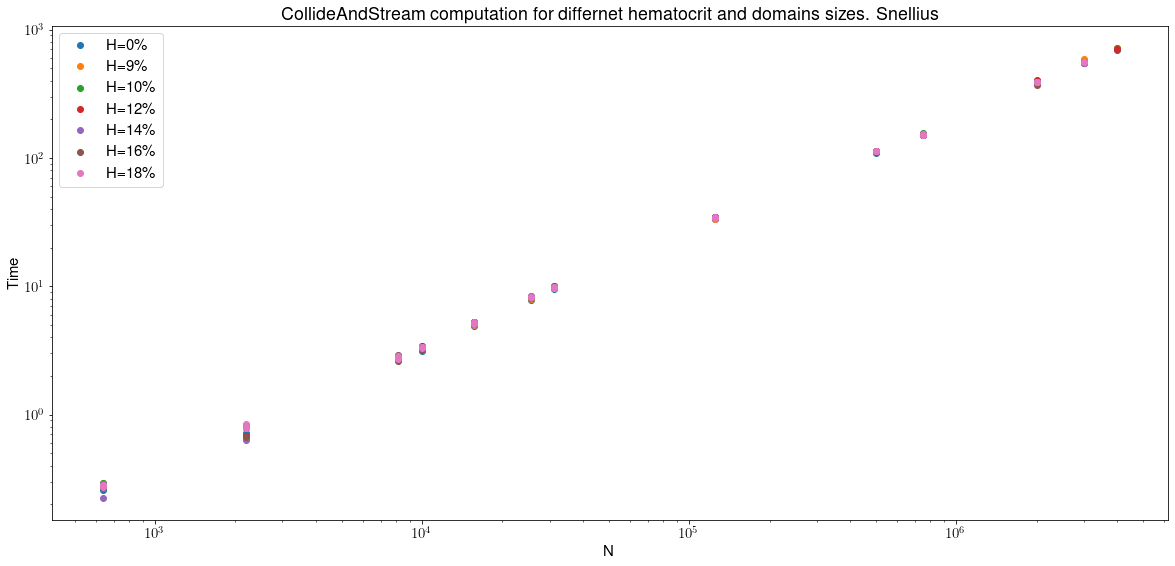

In [13]:
cas_df = raw_df.loc[raw_df['component'] == "collideAndStream"]

sizes = set(cas_df['N'])
Hs = set(cas_df['H'])

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)


for h in Hs:
    plt.plot(cas_df.loc[cas_df['H'] == h]['N'], cas_df.loc[cas_df['H'] == h]['comp'], 'o', label='H='+str(h)+"\%")
    

ax.set_yscale('log')
ax.set_xscale('log')
plt.title('CollideAndStream computation for differnet hematocrit and domains sizes. Snellius')
plt.xlabel('N')
plt.ylabel("Time")
plt.legend()
plt.show()
    

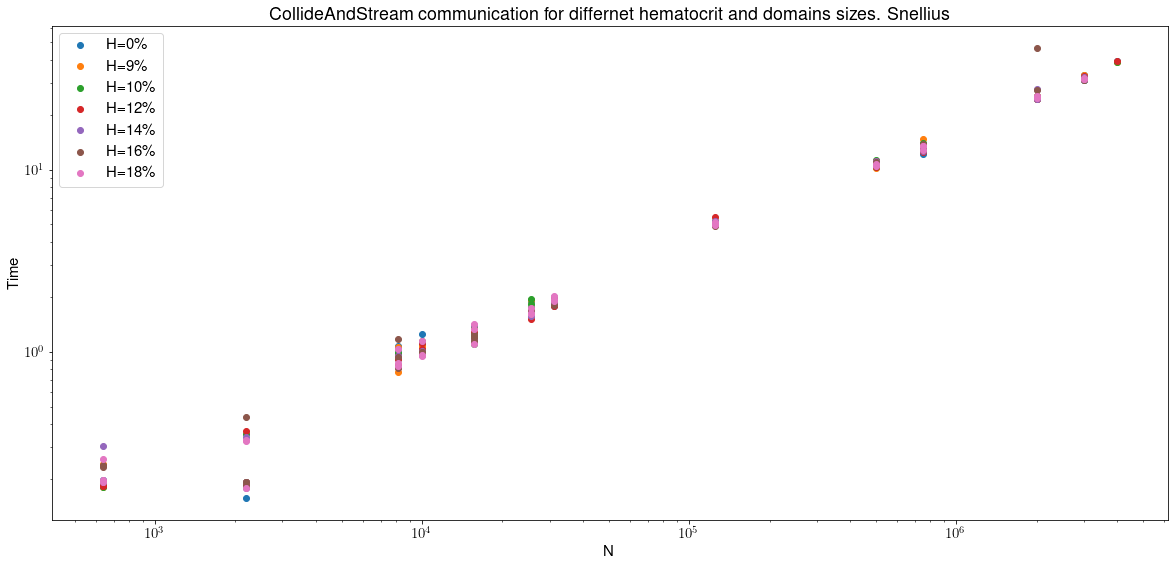

In [14]:
cas_df = raw_df.loc[raw_df['component'] == "collideAndStream"]

sizes = set(cas_df['N'])
Hs = set(cas_df['H'])

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)


for h in Hs:
    plt.plot(cas_df.loc[cas_df['H'] == h]['N'], cas_df.loc[cas_df['H'] == h]['comm'], 'o', label='H='+str(h)+"\%")
    

ax.set_yscale('log')
ax.set_xscale('log')
plt.title('CollideAndStream communication for differnet hematocrit and domains sizes. Snellius')
plt.xlabel('N')
plt.ylabel("Time")
plt.legend()
plt.show()